In [11]:
from lib import *
print(os.listdir("../data")) # this will list files in input directory


['test.csv', 'data_description.txt', 'train.csv', 'sample_submission.csv']


# Load Data

In [12]:
raw_train=pd.read_csv('../data/train.csv')
raw_test=pd.read_csv('../data/test.csv')

In [14]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [15]:
raw_train.tail(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [16]:
raw_test.info() # nulls in Age, Cabin and embarked ( same as train data), here in Fare Also

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [17]:
raw_test.tail(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


We are merging data together, so we can process data, after feature engineering we will split 

In [19]:
data=pd.concat([raw_train, raw_test], axis=0).reset_index(drop=True) # concatinating test and train removing index
data.head(2)
data.info() # surviced will be NaN for test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [20]:
data.isnull().sum()  # finding null per column

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           2721
BedroomAbvGr       0
                ... 
Utilities          2
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
Length: 81, dtype: int64

# Visualization & Data Cleaning

### Cabin

In [239]:
data["Cabin"].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F2                 4
B96 B98            4
                  ..
B80                1
B94                1
C90                1
F E46              1
A6                 1
Name: Cabin, Length: 186, dtype: int64

In [240]:
data["Cabin"].isnull().sum()

1014

In [241]:
# Replace NA as X, kepp initial
data["Cabin"]=data['Cabin'].fillna('X')
data['Cabin']=data['Cabin'].str.get(0)
# cabin number is like 'A01', 'B99' etc. so just keeping first letter to get category so for A01 -> 'A'

In [242]:
data["Cabin"].isnull().sum() # all has been filled

0

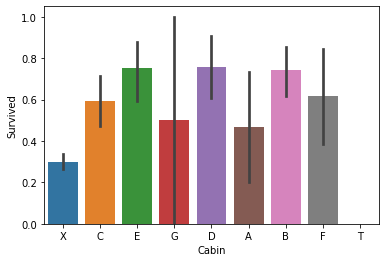

In [243]:
sns.barplot(x="Cabin", y="Survived", data=data) # relation between Cabin and survival

### Embarked

In [244]:
data['Embarked'].isnull().sum()

2

In [245]:
data['Embarked'].value_counts() # embarked - from where, C = Cherbourg, Q = Queenstown, S = Southampton

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [246]:
data[data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


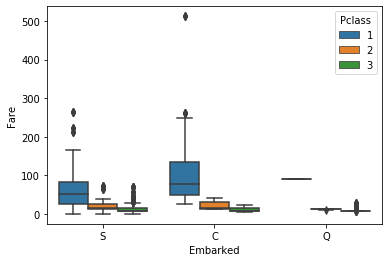

In [247]:
 sns.boxplot(x="Embarked", y="Fare", hue="Pclass",data=data) # relation between Embarked and Fare for each Class


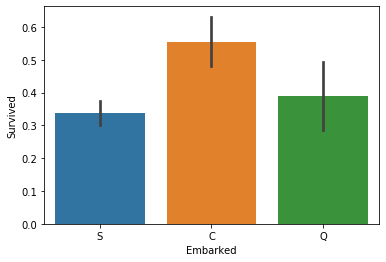

In [248]:
sns.barplot(x='Embarked',y="Survived",data=data)

In [249]:
data['Embarked']=data['Embarked'].fillna('C')

### Fare

In [250]:
data[data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,X,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [251]:
fare=data[(data['Age'] >60) & (data['Embarked'] == "S") & (data['Pclass'] == 3)].Fare # find all fares matching condition
data['Fare']=data['Fare'].fillna(fare.median()) # find media and assign

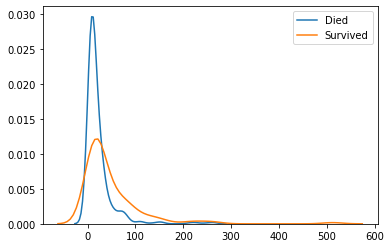

In [252]:
sns.kdeplot(data.loc[data['Survived'] == 0, 'Fare'], label='Died')
sns.kdeplot(data.loc[data['Survived'] == 1, 'Fare'], label='Survived')

### Name

In [253]:
data.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [254]:
# Get Title from Name
data["Title"] = data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
data["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Sir               1
Dona              1
Jonkheer          1
Mme               1
the Countess      1
Lady              1
Don               1
Capt              1
Name: Title, dtype: int64

In [255]:
data["Title"] = data["Title"].replace(['Mlle','Ms'], 'Miss')
data["Title"] = data["Title"].replace(['Mme'], 'Mrs')
data["Title"] = data["Title"].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt'], 'Officer')
data["Title"] = data["Title"].replace(['the Countess', 'Don', 'Lady', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')
data["Title"].value_counts()

Mr         757
Miss       264
Mrs        198
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

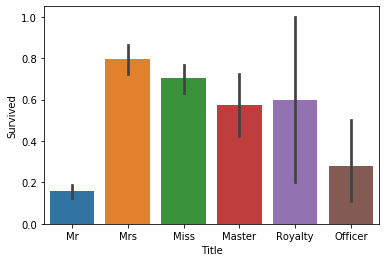

In [256]:
sns.barplot(x="Title", y="Survived", data=data)

### Parch & SibSp

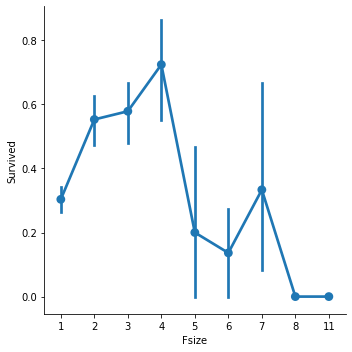

In [257]:
# Create a family size descriptor from SibSp and Parch
data["Fsize"] = data["SibSp"] + data["Parch"] + 1
sns.factorplot(x="Fsize",y="Survived",data = data)

In [258]:
# Create new feature of family size
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
data['FamilyLabel']=data['Fsize'].apply(Fam_label)

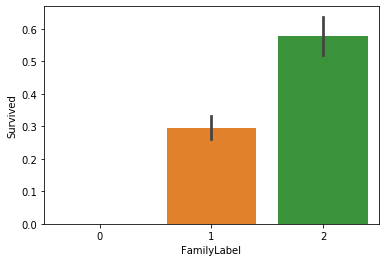

In [259]:
sns.barplot(x="FamilyLabel", y="Survived", data=data)

### Pclass

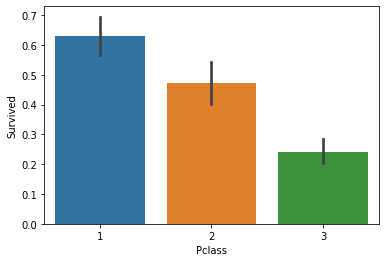

In [260]:
sns.barplot(x="Pclass", y="Survived", data=data)

### Sex

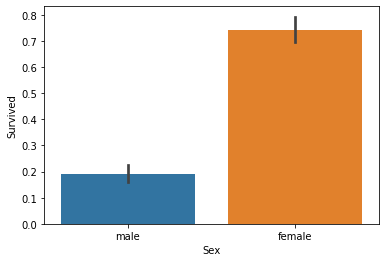

In [261]:
sns.barplot(x="Sex", y="Survived", data=data)

### Ticket

In [262]:
data['Ticket'].value_counts() # ticket sale per ticket type from 1 to 11

CA. 2343    11
1601         8
CA 2144      8
3101295      7
347082       7
            ..
PC 17605     1
345779       1
28404        1
7266         1
113784       1
Name: Ticket, Length: 929, dtype: int64

In [263]:
Ticket_Count = dict(data['Ticket'].value_counts())
data['TicketGroup'] = data['Ticket'].apply(lambda x:Ticket_Count[x])
data['TicketGroup'].value_counts() # group ticket by count of sales

1     713
2     264
3     147
4      64
7      35
5      35
6      24
8      16
11     11
Name: TicketGroup, dtype: int64

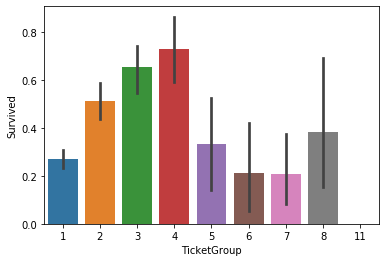

In [264]:
sns.barplot(x='TicketGroup', y='Survived', data=data)

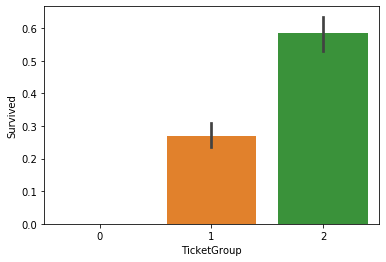

In [265]:
def Ticket_Label(s): # group all having same survival together
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

data['TicketGroup'] = data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=data)

### Age

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Fsize          1309 non-null int64
FamilyLabel    1309 non-null int64
TicketGroup    1309 non-null int64
dtypes: float64(3), int64(7), object(6)
memory usage: 163.8+ KB


In [267]:
age_df = data[['Age', 'Pclass','Sex','Title','Fsize']]

# get_dummies() only works on strings, and convert to one-hot encoding
# here it will only work on String columns ( Sex(male/female) and title)
age_df=pd.get_dummies(age_df) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
age_df.head()

,Age,Pclass,Fsize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,3,2,0,1,0,0,1,0,0,0
1,38.0,1,2,1,0,0,0,0,1,0,0
2,26.0,3,1,1,0,0,1,0,0,0,0
3,35.0,1,2,1,0,0,0,0,1,0,0
4,35.0,3,1,0,1,0,0,1,0,0,0


In [268]:
age_df[age_df.Age.notnull()].as_matrix()# converts df into 2d matrix/ as below

array([[22. ,  3. ,  2. , ...,  0. ,  0. ,  0. ],
       [38. ,  1. ,  2. , ...,  1. ,  0. ,  0. ],
       [26. ,  3. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [28. ,  3. ,  1. , ...,  0. ,  0. ,  0. ],
       [39. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38.5,  3. ,  1. , ...,  0. ,  0. ,  0. ]])

In [269]:
known_age = age_df[age_df.Age.notnull()].as_matrix() # Rows with known age
unknown_age = age_df[age_df.Age.isnull()].as_matrix() # Rows with unknown age
y = known_age[:, 0] # age columns
X = known_age[:, 1:] # all other columns
X

array([[3., 2., 0., ..., 0., 0., 0.],
       [1., 2., 1., ..., 1., 0., 0.],
       [3., 1., 1., ..., 0., 0., 0.],
       ...,
       [3., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [3., 1., 0., ..., 0., 0., 0.]])

In [270]:
#predicting ages for unknown using XGBoost
rfr=xgboost.XGBClassifier()
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
predictedAges[:10]

array([21., 30., 45., 21., 22., 21., 35., 22., 21., 21.])

In [271]:
data.loc[(data.Age.isnull()), 'Age' ] = predictedAges #put predicted ages where it was null
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Fsize,FamilyLabel,TicketGroup
0,22.0,X,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,2,1
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,2
2,26.0,X,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,1,1
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,2
4,35.0,X,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1,1


# Modeling

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
Fsize          1309 non-null int64
FamilyLabel    1309 non-null int64
TicketGroup    1309 non-null int64
dtypes: float64(3), int64(7), object(6)
memory usage: 163.8+ KB


In [273]:
data.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Fsize,FamilyLabel,TicketGroup
0,22.0,X,S,7.25,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,2,1


In [274]:
#choosing required columns and converting to 0/1 for strings
data=data[['Survived','Age','Cabin','Embarked','Fare','Pclass','Sex','TicketGroup','FamilyLabel','Title']]
data=pd.get_dummies(data)
data.head()

,Survived,Age,Fare,Pclass,TicketGroup,FamilyLabel,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0.0,22.0,7.2500,3,1,2,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1,1.0,38.0,71.2833,1,2,2,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1.0,26.0,7.9250,3,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
3,1.0,35.0,53.1000,1,2,2,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0
4,0.0,35.0,8.0500,3,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [275]:
data.tail()

,Survived,Age,Fare,Pclass,TicketGroup,FamilyLabel,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
1304,NaN,21.0,8.0500,3,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1305,NaN,39.0,108.9000,1,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1306,NaN,38.5,7.2500,3,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1307,NaN,21.0,8.0500,3,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1308,NaN,9.0,22.3583,3,2,2,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
Survived         891 non-null float64
Age              1309 non-null float64
Fare             1309 non-null float64
Pclass           1309 non-null int64
TicketGroup      1309 non-null int64
FamilyLabel      1309 non-null int64
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8
Cabin_T          1309 non-null uint8
Cabin_X          1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Sex_female       1309 non-null uint8
Sex_male         1309 non-null uint8
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8


In [277]:
train=data[:len(raw_train)] # take train data
test=data[len(raw_train):].drop(['Survived'],axis=1) # take test data
x = train.drop(['Survived'],axis=1)
y = train.Survived

In [278]:
model = ensemble.RandomForestClassifier(random_state = 10, 
                                      warm_start = True,
                                      n_estimators = 26, 
                                      max_depth = 6, 
                                      max_features = 'sqrt')
model.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=26,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=True)

In [279]:
predictions = model.predict(test)
submission = pd.DataFrame({"PassengerId": raw_test["PassengerId"],
                           "Survived": predictions.astype(np.int32)})
submission.to_csv("../ouput/output.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: '../ouput/output.csv'